In [2]:
import numpy as np
from docplex.cp.model import CpoModel
import matplotlib.pyplot as plt
import networkx as nx

import graph as gr
import dijkstra as dk
import methods as meth

[5 5 5 7 7 4 7 7 4 4 5 6 5 6 4 5 5 4 4 4 4 4 5 4 4]
7
[3 4 6 7]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1]


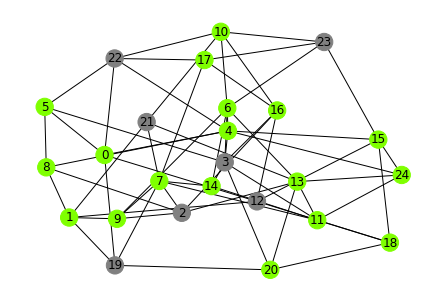

In [3]:
#the 2 following lines can be changed
N = 25
mean_edges_per_vertex = 4

graph = gr.generate_random_graph(N, mean_edges_per_vertex, 1, 1)

V, adj_mat = meth.compute_V_adjmat(graph)

highest_deg = np.max(np.sum(adj_mat, axis = 1))
all_deg = np.sum(adj_mat, axis = 1)
print(all_deg)
print(highest_deg)
ind = np.where(all_deg == highest_deg)[0]

print(ind)

color_map = ['gray']*N

name_edge, all_edges = meth.compute_edges(V, adj_mat)

A = meth.powers_A(adj_mat)

taille_PCC = meth.compute_taille_pcc(V, A)

PCC, rev_PCC = meth.compute_PCC_revPCC(V, graph, taille_PCC, all_edges, name_edge)

ksi = meth.chromatic_number(adj_mat)

mdl = meth.model(adj_mat, all_edges, PCC, rev_PCC)
msol = mdl.solve(TimeLimit = 60, LogVerbosity = 'Quiet')
solution_x = [msol.get_value(f"x_{i}") for i in range(N)]

print(solution_x)

for i in range(N):
    if solution_x[i]==1:
        color_map[i] = 'chartreuse'

G = nx.from_numpy_matrix(np.matrix(adj_mat))
fig1 = plt.figure(1)
nx.draw(G, node_color = color_map, with_labels=True)
plt.savefig("Big_Example2.pdf")
plt.show()